In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
#loading dataset
data=pd.read_csv("mdata.csv")
data.head()

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [3]:
data=data.drop(['Unnamed: 0'],axis=1) #removing first col
data.head()

,id,female,ses,schtyp,prog,read,write,math,science,honors
0,45,female,low,public,vocation,34,35,41,29,not enrolled
1,108,male,middle,public,general,34,33,41,36,not enrolled
2,15,male,high,public,vocation,39,39,44,26,not enrolled
3,67,male,low,public,vocation,37,37,42,33,not enrolled
4,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [4]:
data=data.drop(['id'],axis=1) #removing second col
data.head()

,female,ses,schtyp,prog,read,write,math,science,honors
0,female,low,public,vocation,34,35,41,29,not enrolled
1,male,middle,public,general,34,33,41,36,not enrolled
2,male,high,public,vocation,39,39,44,26,not enrolled
3,male,low,public,vocation,37,37,42,33,not enrolled
4,male,middle,public,vocation,39,31,40,39,not enrolled


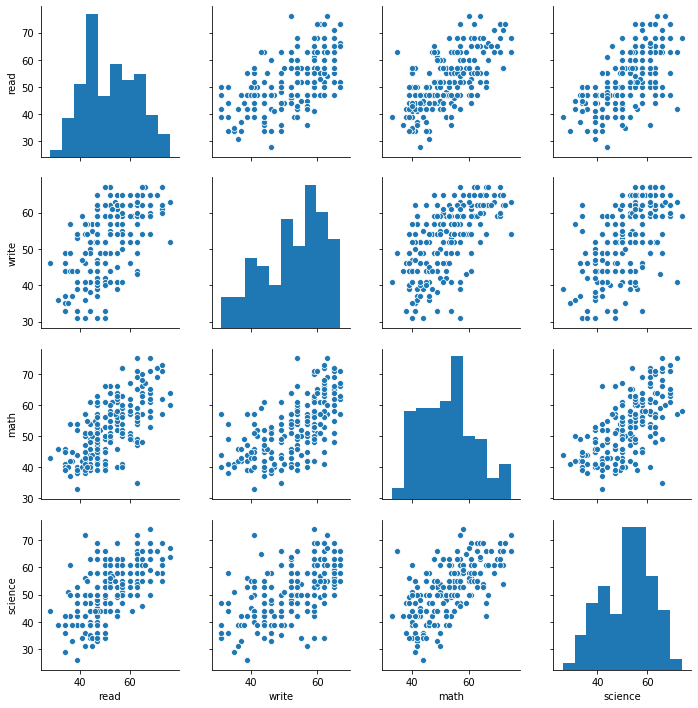

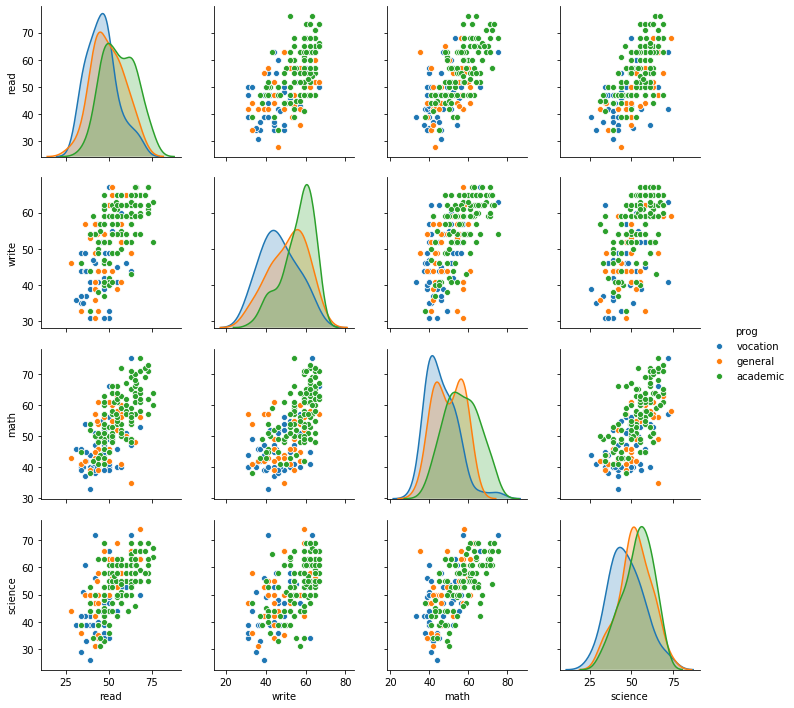

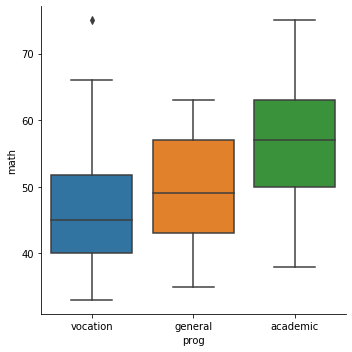

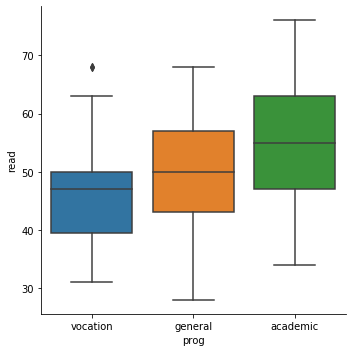

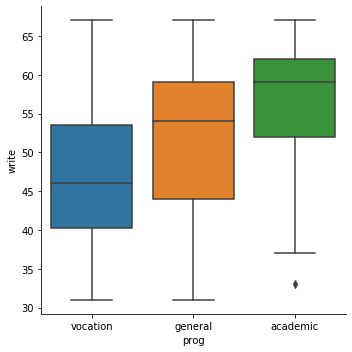

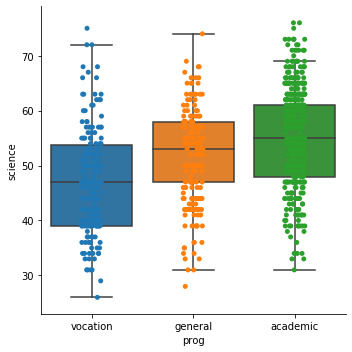

In [5]:
import seaborn as sns
#EDA
data.shape
data.dtypes
data.isna()
data.describe()

sns.pairplot(data)
data.corr()
sns.pairplot(data,hue="prog")
sns.catplot(x="prog", y="math", kind="box", data=data);
sns.catplot(x="prog", y="read", kind="box", data=data);
sns.catplot(x="prog", y="write", kind="box", data=data);
sns.catplot(x="prog", y="science", kind="box", data=data);

sns.stripplot(x="prog",y="math",jitter=True,data=data)
sns.stripplot(x="prog",y="read",jitter=True,data=data)
sns.stripplot(x="prog",y="write",jitter=True,data=data)
sns.stripplot(x="prog",y="science",jitter=True,data=data)

In [6]:
#dummies for honors
dummy=pd.get_dummies(data.honors)
data = pd.concat([data,dummy],axis=1)
data.drop(['honors'],axis=1)
data.head()


,female,ses,schtyp,prog,read,write,math,science,honors,enrolled,not enrolled
0,female,low,public,vocation,34,35,41,29,not enrolled,0,1
1,male,middle,public,general,34,33,41,36,not enrolled,0,1
2,male,high,public,vocation,39,39,44,26,not enrolled,0,1
3,male,low,public,vocation,37,37,42,33,not enrolled,0,1
4,male,middle,public,vocation,39,31,40,39,not enrolled,0,1


In [7]:
data.drop(['honors'],axis=1,inplace=True)
data.head()

,female,ses,schtyp,prog,read,write,math,science,enrolled,not enrolled
0,female,low,public,vocation,34,35,41,29,0,1
1,male,middle,public,general,34,33,41,36,0,1
2,male,high,public,vocation,39,39,44,26,0,1
3,male,low,public,vocation,37,37,42,33,0,1
4,male,middle,public,vocation,39,31,40,39,0,1


In [8]:
#dummies for prog
dummy=pd.get_dummies(data.prog)
data = pd.concat([data,dummy],axis=1)
data.drop(['prog'],axis=1,inplace=True)
data.head()

,female,ses,schtyp,read,write,math,science,enrolled,not enrolled,academic,general,vocation
0,female,low,public,34,35,41,29,0,1,0,0,1
1,male,middle,public,34,33,41,36,0,1,0,1,0
2,male,high,public,39,39,44,26,0,1,0,0,1
3,male,low,public,37,37,42,33,0,1,0,0,1
4,male,middle,public,39,31,40,39,0,1,0,0,1


In [9]:
#dummies for ses
dummy=pd.get_dummies(data.ses)
data = pd.concat([data,dummy],axis=1)
data.drop(['ses'],axis=1,inplace=True)
data.head()

,female,schtyp,read,write,math,science,enrolled,not enrolled,academic,general,vocation,high,low,middle
0,female,public,34,35,41,29,0,1,0,0,1,0,1,0
1,male,public,34,33,41,36,0,1,0,1,0,0,0,1
2,male,public,39,39,44,26,0,1,0,0,1,1,0,0
3,male,public,37,37,42,33,0,1,0,0,1,0,1,0
4,male,public,39,31,40,39,0,1,0,0,1,0,0,1


In [10]:
#dummies for female
dummy=pd.get_dummies(data.female)
data = pd.concat([data,dummy],axis=1)
data.drop(['female'],axis=1,inplace=True)
data.head()

,schtyp,read,write,math,science,enrolled,not enrolled,academic,general,vocation,high,low,middle,male
0,public,34,35,41,29,0,1,0,0,1,0,1,0,0
1,public,34,33,41,36,0,1,0,1,0,0,0,1,1
2,public,39,39,44,26,0,1,0,0,1,1,0,0,1
3,public,37,37,42,33,0,1,0,0,1,0,1,0,1
4,public,39,31,40,39,0,1,0,0,1,0,0,1,1


In [11]:
#dummies for schtyp
dummy=pd.get_dummies(data.schtyp)
data = pd.concat([data,dummy],axis=1)
data.drop(['schtyp'],axis=1,inplace=True)
data.head()

,read,write,math,science,enrolled,not enrolled,academic,general,vocation,high,low,middle,male,private,public
0,34,35,41,29,0,1,0,0,1,0,1,0,0,0,1
1,34,33,41,36,0,1,0,1,0,0,0,1,1,0,1
2,39,39,44,26,0,1,0,0,1,1,0,0,1,0,1
3,37,37,42,33,0,1,0,0,1,0,1,0,1,0,1
4,39,31,40,39,0,1,0,0,1,0,0,1,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train,test = train_test_split(data,test_size = 0.2)

# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class="multinomial",solver="newton-cg").fit(train.iloc[:,1:],train.iloc[:,0])

train_predict = model.predict(train.iloc[:,1:]) # Train predictions 
test_predict = model.predict(test.iloc[:,1:]) # Test predictions

C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [13]:
from sklearn.metrics import accuracy_score
# Train accuracy 
accuracy_score(train.iloc[:,0],train_predict) 

0.325

In [14]:
# Test accuracy 
accuracy_score(test.iloc[:,0],test_predict)

0.125